In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [159]:
df = pd.read_csv('./S1Data.csv')
df.head()

,Event,TIME,Gender,Smoking,Diabetes,BP,Anaemia,Age,Ejection.Fraction,Sodium,Creatinine,Pletelets,CPK
0,0,97,0,0,0,0,1,43.0,50,135,1.30,237000.00,358
1,0,180,1,1,1,0,1,73.0,30,142,1.18,160000.00,231
2,1,31,1,1,0,1,0,70.0,20,134,1.83,263358.03,582
3,0,87,1,0,0,0,1,65.0,25,141,1.10,298000.00,305
4,0,113,1,0,0,0,0,64.0,60,137,1.00,242000.00,1610


In [3]:
df.describe()

,TIME,Event,Gender,Smoking,Diabetes,BP,Anaemia,Age,Ejection.Fraction,Sodium,Creatinine,Pletelets,CPK
count,299.000000,299.00000,299.000000,299.00000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,130.260870,0.32107,0.648829,0.32107,0.418060,0.351171,0.431438,60.833893,38.083612,136.625418,1.39388,263358.029264,581.839465
std,77.614208,0.46767,0.478136,0.46767,0.494067,0.478136,0.496107,11.894809,11.834841,4.412477,1.03451,97804.236869,970.287881
min,4.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,40.000000,14.000000,113.000000,0.50000,25100.000000,23.000000
25%,73.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,51.000000,30.000000,134.000000,0.90000,212500.000000,116.500000
50%,115.000000,0.00000,1.000000,0.00000,0.000000,0.000000,0.000000,60.000000,38.000000,137.000000,1.10000,262000.000000,250.000000
75%,203.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,70.000000,45.000000,140.000000,1.40000,303500.000000,582.000000
max,285.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,95.000000,80.000000,148.000000,9.40000,850000.000000,7861.000000


In [5]:
df.isnull().sum()

TIME                 0
Event                0
Gender               0
Smoking              0
Diabetes             0
BP                   0
Anaemia              0
Age                  0
Ejection.Fraction    0
Sodium               0
Creatinine           0
Pletelets            0
CPK                  0
dtype: int64

In [107]:
threshold_unique_value = 10
def get_continuous_feature(df):
    continuous_feature_list = []
    for feature in df:
        if len(df[feature].unique()) > threshold_unique_value:
            continuous_feature_list.append(feature)
    return continuous_feature_list

def get_cat_feature(df):
    cat_feature_list = []
    for feature in df:
        if len(df[feature].unique()) <= threshold_unique_value:
            cat_feature_list.append(feature)
    return cat_feature_list

continuous_feature_list = get_continuous_feature(df)
cat_feature_list = get_cat_feature(df)

<Figure size 432x288 with 0 Axes>

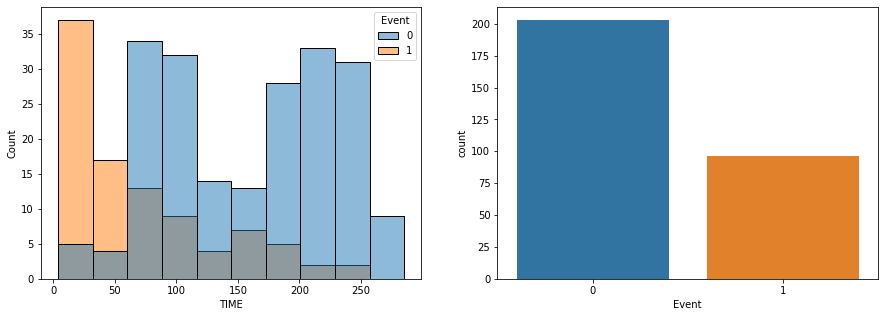

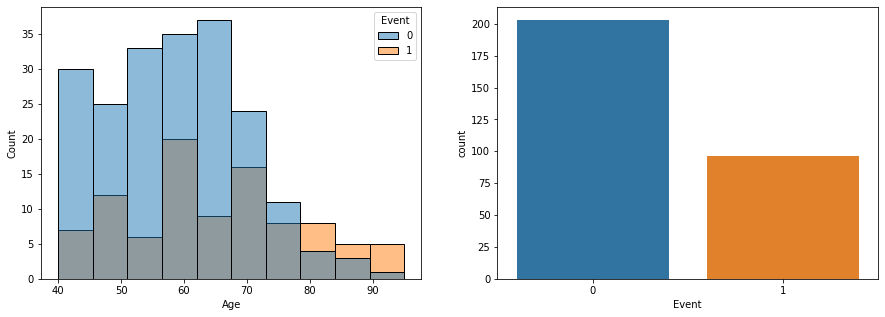

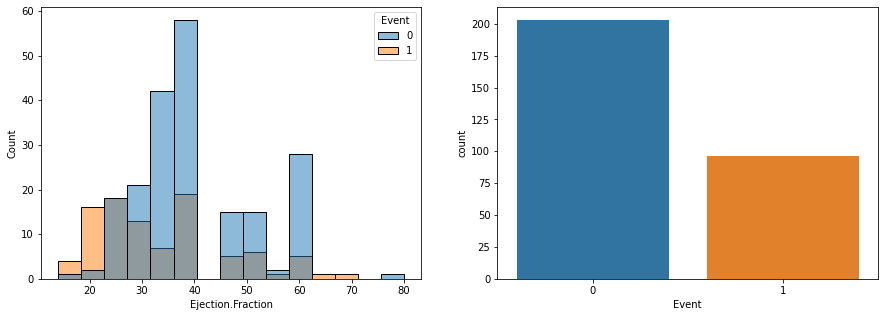

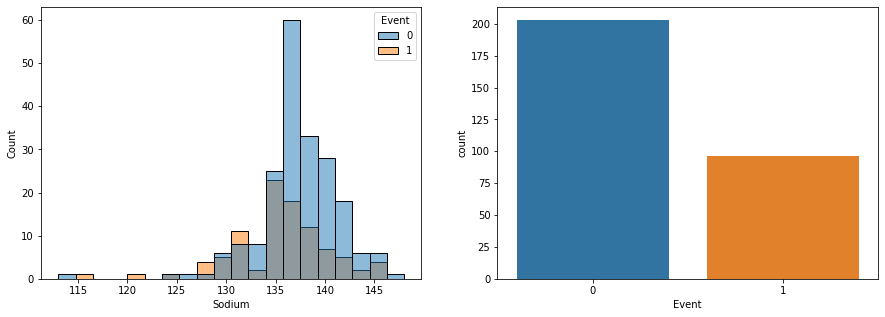

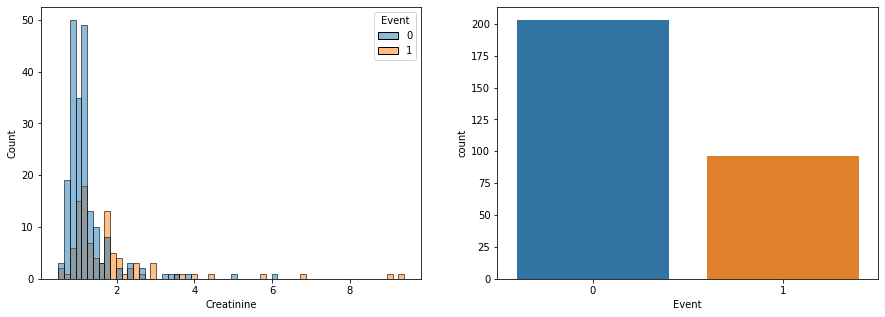

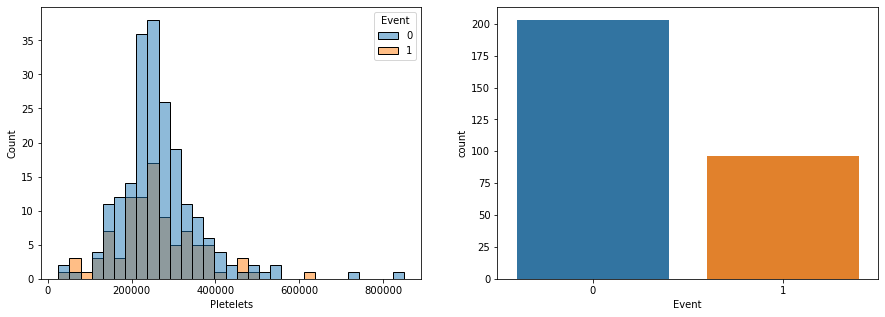

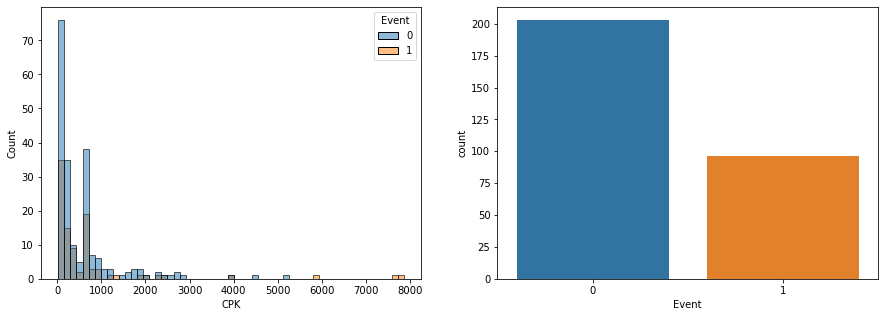

In [169]:
def plt_histogram(df, feature_list):
    for i, feature in enumerate(feature_list):
        plt.figure(i)
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        sns.histplot(x=feature, hue="Event", data = df, ax = axes[0])
        sns.countplot(x="Event",  data = df,  ax = axes[1])
plt_histogram(df,continuous_feature_list)

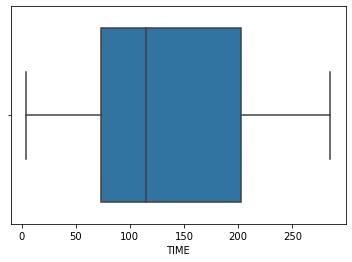

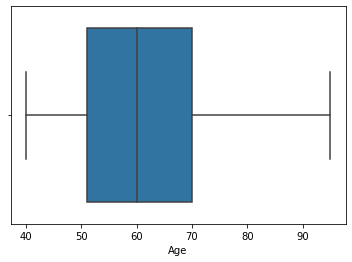

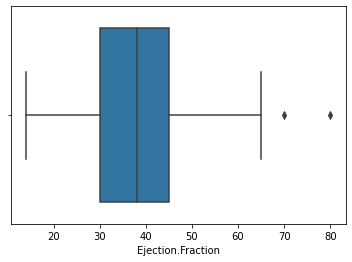

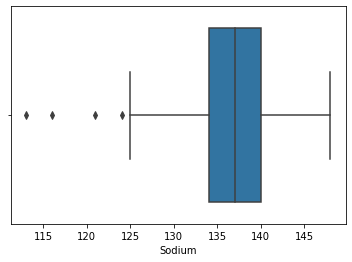

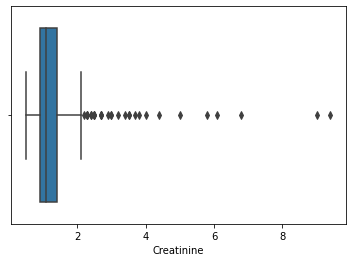

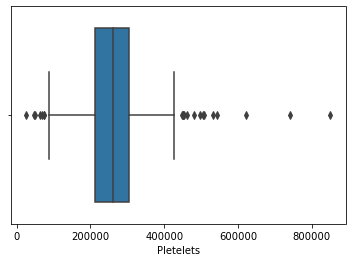

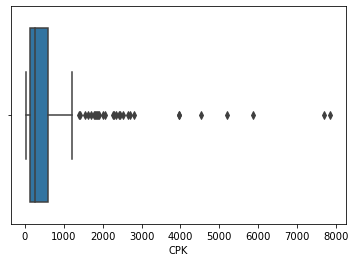

In [35]:
def plt_boxplot(df, feature_list):
    for i, feature in enumerate(feature_list):
        plt.figure(i)
        sns.boxplot(x=feature, data = df)
plt_boxplot(df,continuous_feature_list)

In [30]:
sns.boxplot(x=feature, data = df)

['TIME',
 'Age',
 'Ejection.Fraction',
 'Sodium',
 'Creatinine',
 'Pletelets',
 'CPK']

In [60]:
test_df = df.copy()

C:\Users\Hp\anaconda3\envs\pytorch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Hp\anaconda3\envs\pytorch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


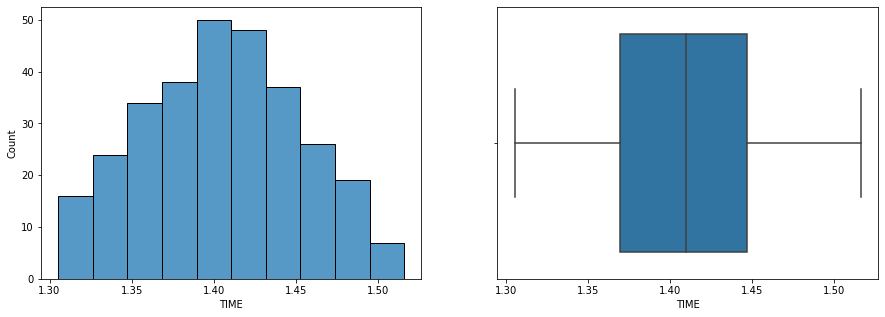

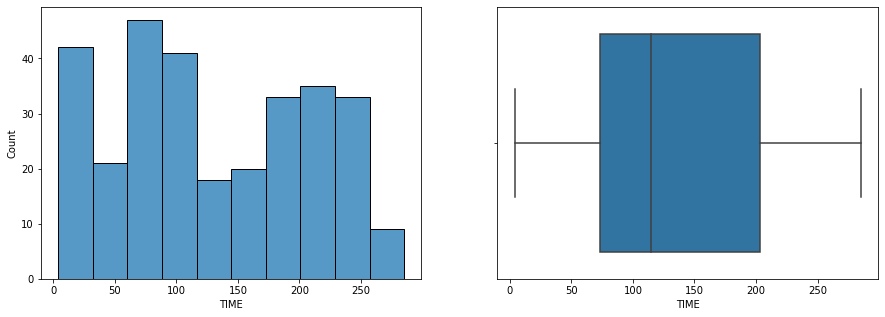

In [79]:
feature = "TIME"
def plot_box_hist(df, feature):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    sns.histplot(df[feature], ax=axes[0])
    sns.boxplot(df[feature], ax=axes[1])
plot_box_hist(test_df,feature)
plot_box_hist(df,feature)

In [68]:
test_df[feature].describe()

count    299.000000
mean       1.407217
std        0.047847
min        1.305323
25%        1.369104
50%        1.409607
75%        1.446565
max        1.515979
Name: Sodium, dtype: float64

In [52]:
# test_df[feature] = test_df.Age**(.5)

In [58]:
# test_df[feature] = 1/ test_df.Age

In [77]:
# test_df[feature] = np.log(test_df.Age)

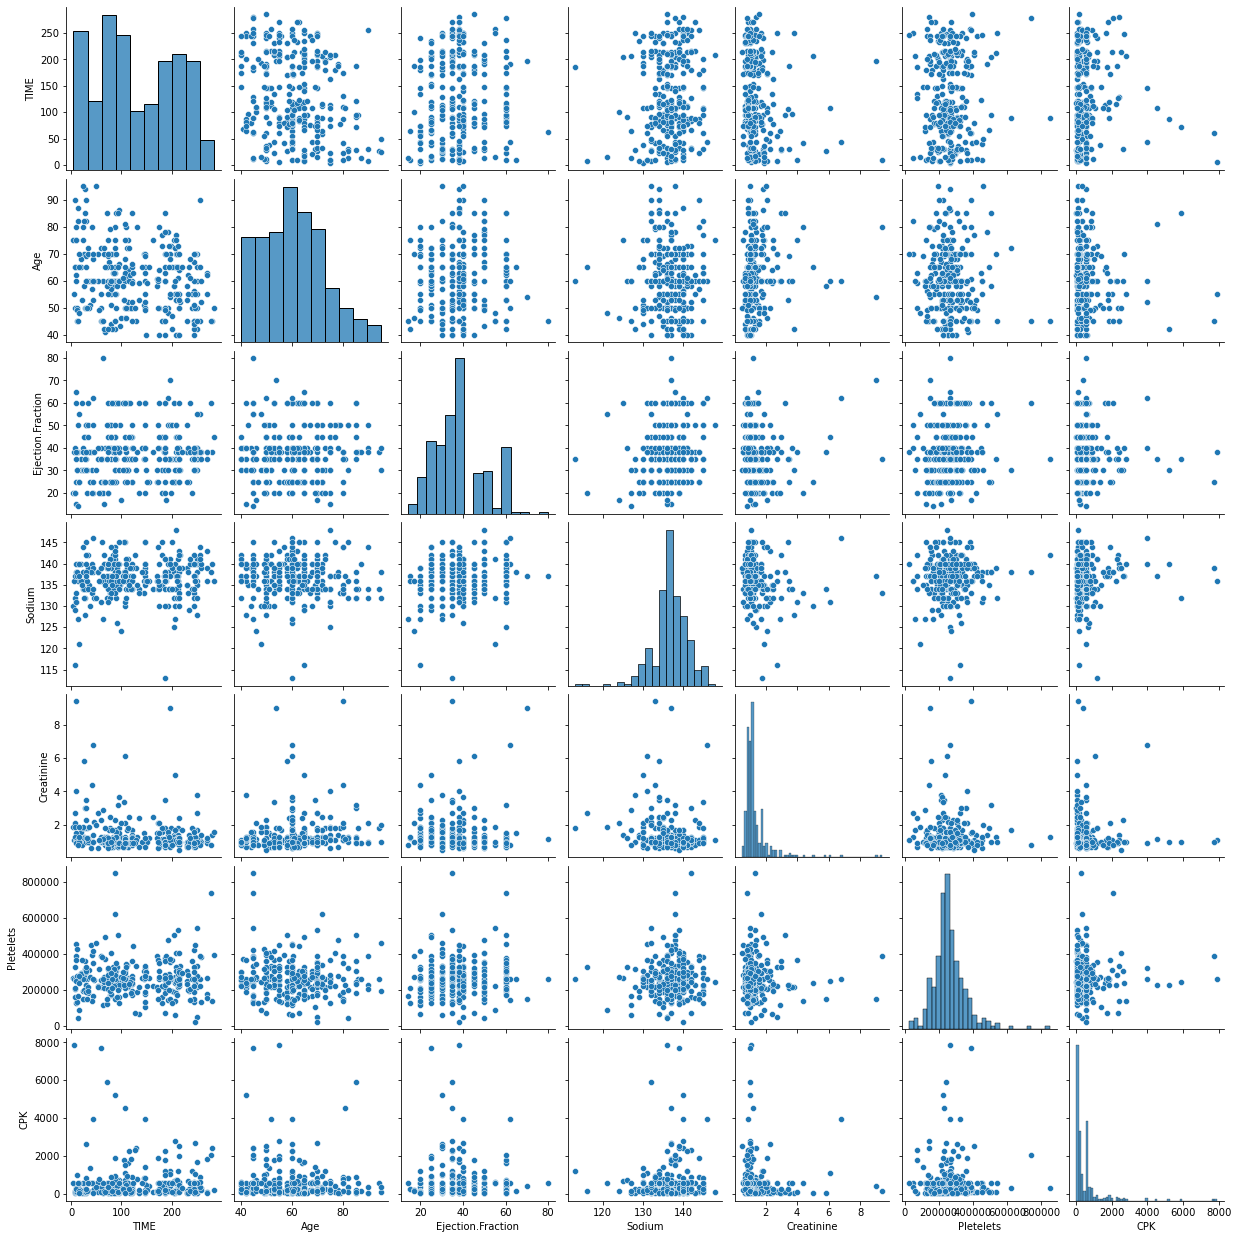

In [80]:
sns.pairplot(df[continuous_feature_list])

In [160]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [102]:
   
def get_metric(y_test, y_pred):
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import f1_score
    from sklearn.metrics import matthews_corrcoef

    CM = confusion_matrix(y_test, y_pred)
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]

    TP_rate = TP/(TP+FN)
    TN_rate = TN/(TN+FP)
    accuracy = (TP+TN)/(TP+FP+FN+TN)
    f1 = f1_score(y_test, y_pred)
    MCC = matthews_corrcoef(y_test, y_pred)
    return MCC, accuracy, f1, TP_rate, TN_rate
    
def save_default_model(name):
    import joblib
    joblib.dump(self.model, f'{name}.pkl')

def save_grid_model(name, type=0):
    import joblib
    if type == 0:
        joblib.dump(self.grid_search.best_estimator_, f'{name}.pkl')
    else:
        joblib.dump(self.grid_search, f'{name}.pkl')

In [103]:
from abc import ABC, abstractmethod
class GenearalSklearnClassifier(ABC):
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.accuracy = 0
        self.TP_rate= 0
        self.TN_rate = 0
        self.MCC = 0
        self.f1 = 0
        
        self.accuracy_list_test = []
        self.TP_rate_list_test = []
        self.TN_rate_list_test = []
        self.f1_list_test = []
        self.MCC_list_test = []

    @abstractmethod
    def preprocessing_feature(self):
        pass
    
    @abstractmethod
    def visualize_parameter_effect(self):
        pass
    
    def train_model_default(self):
        from sklearn.model_selection import KFold
        
        count = 0
        
        for i in range(20):
            kf = KFold(n_splits=5, shuffle=True)
            for train_index, test_index in kf.split(X):
                X_train, X_test = self.X.iloc[train_index], self.X.iloc[test_index]
                y_train, y_test = self.y.iloc[train_index], self.y.iloc[test_index]
                self.model.fit(X_train,y_train)
                y_pred = self.model.predict(X_test)
                MCC_test, accuracy_test, f1_test, TP_rate_test, TN_rate_test = get_metric(y_test, y_pred)

                self.accuracy_list_test.append(accuracy_test)
                self.f1_list_test.append(f1_test)
                self.TP_rate_list_test.append(TP_rate_test)
                self.TN_rate_list_test.append(TN_rate_test)
                self.MCC_list_test.append(MCC_test)
                
                count = count + 1
                print(count)
            
        self.accuracy = sum(self.accuracy_list_test) / len(self.accuracy_list_test)
        self.f1 = sum(self.f1_list_test) / len(self.f1_list_test)
        self.TN_rate = sum(self.TN_rate_list_test) / len(self.TN_rate_list_test)
        self.TP_rate = sum(self.TP_rate_list_test) / len(self.TP_rate_list_test)
        self.MCC = sum(self.MCC_list_test) / len(self.MCC_list_test)
        
        print(f'MCC: {self.MCC} , accuracy: {self.accuracy} , f1: {self.f1}, TP_rate: {self.TP_rate} , TN_rate: {self.TN_rate}')
        print("Train success")
      
    def train_model_hyperparameter(self):
        from sklearn.metrics import make_scorer, matthews_corrcoef
#         from sklearn.ensemble import RandomForestClassifier
        from sklearn.model_selection import train_test_split
        from sklearn.model_selection import GridSearchCV
        
#         self.model=RandomForestClassifier(n_estimators=100)
        self.grid_search = GridSearchCV(estimator = self.model, 
                                        param_grid = self.param_grid, 
                                        scoring=make_scorer(matthews_corrcoef),
                                        return_train_score=True,
                                        cv = 5, n_jobs = -1, verbose = 2)
        
        X_train, X_test, y_train, y_test = train_test_split(self.X,self.y,test_size = 0.2, shuffle=True)
        self.grid_search.fit(X_train, y_train)
        y_pred = self.grid_search.predict(X_test)
        
        print(self.grid_search.best_params_) 
        MCC_test, accuracy_test, f1_test, TP_rate_test, TN_rate_test = get_metric(y_test, y_pred)
        print(f'MCC: {MCC_test} , accuracy: {accuracy_test} , f1: {f1_test}, TP_rate: {TP_rate_test} , TN_rate: {TN_rate_test}')
        print("Train success")


In [134]:
class RandomForest(GenearalSklearnClassifier):
    def __init__(self, X, y):
        super().__init__(X, y)
        from sklearn.ensemble import RandomForestClassifier
        self.model=RandomForestClassifier()
        self.param_grid = {
            'bootstrap': [True],
            'max_depth': [5, 7, 9, 11],
            'max_features': [2, 3],
            'min_samples_leaf': [3, 4, 5],
            'min_samples_split': np.arange(2,8,2),
            'n_estimators': np.arange(50,300,50)
        }
        
    def preprocessing_feature(self):
        print("")
        
    def visualize_parameter_effect(self):
        mean_test_score = self.grid_search.cv_results_['mean_test_score']
        mean_train_score = self.grid_search.cv_results_['mean_train_score']
        param_n_estimators = self.grid_search.cv_results_["param_n_estimators"]
        param_min_samples_split = self.grid_search.cv_results_["param_min_samples_split"]
        sns.lineplot(x=param_n_estimators, y=mean_test_score)
        sns.lineplot(x=param_n_estimators, y=mean_train_score)

In [135]:
RF = RandomForest(X, y)
RF.train_model_default()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
MCC: 0.6308676732787594 , accuracy: 0.8408361581920903 , f1: 0.7358639399124197, TP_rate: 0.7064356608606542 , TN_rate: 0.9085583053791109
Train success


In [150]:
RF.grid_search.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_bootstrap', 'param_max_depth', 'param_max_features', 'param_min_samples_leaf', 'param_min_samples_split', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])

In [136]:
RF = RandomForest(X, y)
RF.train_model_hyperparameter()

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
{'bootstrap': True, 'max_depth': 11, 'max_features': 3, 'min_samples_leaf': 5, 'min_samples_split': 4, 'n_estimators': 50}
MCC: 0.658702969519582 , accuracy: 0.85 , f1: 0.7692307692307692, TP_rate: 0.75 , TN_rate: 0.9
Train success


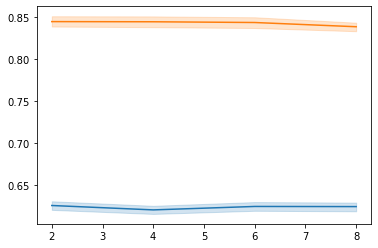

In [105]:
RF.visualize_parameter_effect()

In [142]:
class SVM(GenearalSklearnClassifier):
    def __init__(self, X, y):
        super().__init__(X, y)
        from sklearn.svm import SVC
        self.model = SVC()
        self.param_grid = {
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100],
            'gamma': ['auto', 'scale']
        }
        
    def preprocessing_feature(self):
        from sklearn.preprocessing import StandardScaler
        scaler = StandardScaler()
        scaled_features = scaler.fit_transform(self.X)
        self.X = pd.DataFrame(scaled_features, index=X.index, columns=X.columns)
        return self.X
        
    def visualize_parameter_effect(self):
        mean_test_score = self.grid_search.cv_results_['mean_test_score']
        mean_train_score = self.grid_search.cv_results_['mean_train_score']
        param_C = self.grid_search.cv_results_["param_C"]
        param_kernel = self.grid_search.cv_results_["param_kernel"]
        sns.lineplot(x=param_C, y=mean_test_score)
        sns.lineplot(x=param_C, y=mean_train_score)
        

In [138]:
SVM_cls = SVM(X, y)
transformed = SVM_cls.preprocessing_feature()
SVM_cls.train_model_default()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
MCC: 0.5297024379181022 , accuracy: 0.8008107344632763 , f1: 0.6576875117570161, TP_rate: 0.6078031805000712 , TN_rate: 0.8940039285624011
Train success


In [146]:
SVM_cls = SVM(X, y)
transformed = SVM_cls.preprocessing_feature()
SVM_cls.train_model_hyperparameter()

Fitting 5 folds for each of 72 candidates, totalling 360 fits
{'C': 0.05, 'gamma': 'auto', 'kernel': 'linear'}
MCC: 0.5178087050187165 , accuracy: 0.8166666666666667 , f1: 0.6206896551724139, TP_rate: 0.5294117647058824 , TN_rate: 0.9302325581395349
Train success


In [149]:
SVM_cls.grid_search.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_gamma', 'param_kernel', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])

In [151]:
class GradientBoosting(GenearalSklearnClassifier):
    def __init__(self, X, y):
        super().__init__(X, y)
        from sklearn.ensemble import GradientBoostingClassifier
        self.model = GradientBoostingClassifier()
        self.param_grid = {
            "learning_rate":[0.01,0.1,1,10,100],
            'max_depth': [5, 7, 9, 11],
            'min_samples_leaf': [3, 4, 5],
            'min_samples_split': [2, 4, 6, 8],
            'n_estimators': np.arange(50,300,50)
        }
        
    def preprocessing_feature(self):
        print("")
        
    def visualize_parameter_effect(self):
        mean_test_score = self.grid_search.cv_results_['mean_test_score']
        mean_train_score = self.grid_search.cv_results_['mean_train_score']
        param_n_estimators = self.grid_search.cv_results_["param_n_estimators"]
        param_min_samples_split = self.grid_search.cv_results_["param_min_samples_split"]
        sns.lineplot(x=param_min_samples_split, y=mean_test_score)
        sns.lineplot(x=param_min_samples_split, y=mean_train_score)

In [152]:
XGB = GradientBoosting(X, y)
XGB.train_model_default()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
MCC: 0.5971289490829096 , accuracy: 0.824971751412429 , f1: 0.7174978392750144, TP_rate: 0.7100548561425074 , TN_rate: 0.8818838126297481
Train success


In [154]:
import torch
import torch.nn as nn
torch.cuda.is_available()

True

In [161]:
from sklearn.model_selection import train_test_split
X_NN = np.array(X)
y_NN = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X_NN, y_NN, test_size=0.2, random_state=1)
rate = 0.25
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=rate, random_state=1) 

from torch.utils.data import DataLoader, TensorDataset
train_data = TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
valid_data = TensorDataset(torch.from_numpy(X_val), torch.from_numpy(y_val))
test_data = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))

batch_size = 5
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)

In [165]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_dim1, output_size, p_drop):
        super(NeuralNetwork, self).__init__()
        self.input_size = input_size
        self.hidden_dim1 = hidden_dim1
        self.output_size = output_size
        self.p_drop = p_drop
        
        self.fc1 = nn.Linear(input_size, hidden_dim1)
        self.out_layer = nn.Linear(hidden_dim1, output_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p_drop)
        self.batchnorm1 = nn.BatchNorm1d(hidden_dim1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x, batch_size):
        out = self.relu(self.fc1(x))
        out = self.batchnorm1(out)
        self.dropout(out)
        out = self.out_layer(out)
        
        return out 

In [166]:
NN = NeuralNetwork(len(X.columns), 100, 1, 0.3)
NN

NeuralNetwork(
  (fc1): Linear(in_features=12, out_features=100, bias=True)
  (out_layer): Linear(in_features=100, out_features=2, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.3, inplace=False)
  (batchnorm1): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (sigmoid): Sigmoid()
)

In [163]:
def train(nn_model, criterion, optimizer):
    NN.train()
    epoch_loss_train = 0
    for x, y in train_loader:
        if(torch.cuda.is_available()):
            x = x.cuda()
            y = y.cuda()
        NN.zero_grad()
        pred = NN(x.float(), 3)
        loss = criterion(pred, y.unsqueeze(1).float())
        loss.backward()
        optimizer.step()
        epoch_loss_train = epoch_loss_train + loss.item()
    
    average_loss = epoch_loss_train/len(train_loader)
    return average_loss

12

In [ ]:
epochs = 100
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(nn_model.parameters(), lr=params["lr"])
check = 0
loss_training =[]
acc_arr = []
epoch_arr = []

for epoch in range(epochs):
    train_loss = train(nn_model, criterion, optimizer)
#         acc = test(nn_model, criterion)

    print(f'epoch: {epoch+ 1}/{epochs}, train_loss: {train_loss}')
    epoch_arr.append(epoch)
    loss_training.append(train_loss)

In [ ]:
from optuna.trial import Trial
def main_train(trial):
    params = {
        "lr": trial.suggest_loguniform("lr", 1e-4, 1e-2),
        "p_drop": trial.suggest_uniform("p_drop", 0.3, 0.5),
        "hidden_dim1": trial.suggest_int("hidden_dim1", 100, 256),
    }
    
    nn_model = NN(input_size,params["hidden_dim1"],1, params["p_drop"])
#     nn_model = NN(input_size,64,64,1, params["p_drop"])
    if(torch.cuda.is_available()):
        nn_model = nn_model.cuda()

    epochs = 100
    criterion = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.Adam(nn_model.parameters(), lr=params["lr"])
    check = 0
    loss_training =[]
    acc_arr = []
    epoch_arr = []
    
    for epoch in range(epochs):
        train_loss = train(nn_model, criterion, optimizer)
#         acc = test(nn_model, criterion)
        
        print(f'epoch: {epoch+ 1}/{epochs}, train_loss: {train_loss}')
        epoch_arr.append(epoch)
        loss_training.append(train_loss)
    